In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between (-3, +3)
Y = np.cos(2 * X[:,0]) + np.cos(3 * X[:, 1])
# 𝑦=cos(2𝑥1)+𝑐𝑜𝑠(3𝑥2)

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2, ), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [6]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 564us/sample - loss: 0.9238
Epoch 2/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.9070
Epoch 3/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.8878
Epoch 4/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.8656
Epoch 5/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.8699
Epoch 6/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.8389
Epoch 7/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.7864
Epoch 8/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.7053
Epoch 9/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.6737
Epoch 10/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.6635
Epoch 11/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.5873
Epoch 12/100
1000/

Epoch 94/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0086
Epoch 95/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0169
Epoch 96/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0087
Epoch 97/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0180
Epoch 98/100
1000/1000 [==============================] - 0s 42us/sample - loss: 0.0244
Epoch 99/100
1000/1000 [==============================] - 0s 39us/sample - loss: 0.0243
Epoch 100/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0273


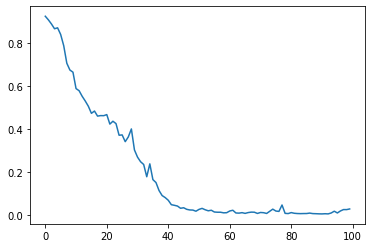

In [7]:
plt.plot(r.history['loss'], label='loss')

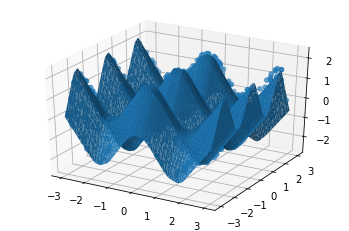

In [9]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()